In [ ]:
"""

Data set is obtained from: "https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset"



Description:
The Global Earthquake-Tsunami Risk Assessment Dataset is a comprehensive, machine learning-ready dataset 
containing seismic characteristics and tsunami potential indicators for 782 significant earthquakes recorded globally
from 2001 to 2022. This dataset is specifically designed for tsunami risk prediction, earthquake analysis,
 and seismic hazard assessment applications.


magnitude	Float	Earthquake magnitude (Richter scale)	6.5 - 9.1	High - Primary tsunami predictor
cdi	        Integer	Community Decimal Intensity (felt intensity)	0 - 9	Medium - Population impact measure
mmi	        Integer	Modified Mercalli Intensity (instrumental)	1 - 9	Medium - Structural damage indicator
sig	        Integer	Event significance score	650 - 2910	High - Overall hazard assessment
nst	        Integer	Number of seismic monitoring stations	0 - 934	Low - Data quality indicator
dmin	    Float	Distance to nearest seismic station (degrees)	0.0 - 17.7	Low - Location precision
gap	        Float	Azimuthal gap between stations (degrees)	0.0 - 239.0	Low - Location reliability
depth	    Float	Earthquake focal depth (km)	2.7 - 670.8	High - Shallow = higher tsunami risk
latitude	Float	Epicenter latitude (WGS84)	-61.85° to 71.63°	High - Ocean proximity indicator
longitude	Float	Epicenter longitude (WGS84)	-179.97° to 179.66°	High - Ocean proximity indicator
Year	    Integer	Year of occurrence	2001 - 2022	Medium - Temporal patterns
Month	    Integer	Month of occurrence	1 - 12	Low - Seasonal analysis
tsunami	    Binary	Tsunami potential (TARGET)	0, 1	TARGET VARIABLE
scalable params= ['sig', 'nst', 'dmin', 'gap', 'depth']

"""

c:\Users\O.J\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ConnectionError: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/jimschacko/wall-following-robot-navigation-dataset (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001CB205C7990>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)"))

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


data = pd.read_csv(r"C:\Users\O.J\Downloads\Compressed\Global Earthquake-Tsunami Risk Assessment Dataset\earthquake_data_tsunami.csv")

In [3]:
#print(data.info())
print(pd.DataFrame(data.describe()))
#print(data.value_counts())

        magnitude         cdi         mmi          sig         nst  \
count  782.000000  782.000000  782.000000   782.000000  782.000000   
mean     6.941125    4.333760    5.964194   870.108696  230.250639   
std      0.445514    3.169939    1.462724   322.465367  250.188177   
min      6.500000    0.000000    1.000000   650.000000    0.000000   
25%      6.600000    0.000000    5.000000   691.000000    0.000000   
50%      6.800000    5.000000    6.000000   754.000000  140.000000   
75%      7.100000    7.000000    7.000000   909.750000  445.000000   
max      9.100000    9.000000    9.000000  2910.000000  934.000000   

             dmin         gap       depth    latitude   longitude  \
count  782.000000  782.000000  782.000000  782.000000  782.000000   
mean     1.325757   25.038990   75.883199    3.538100   52.609199   
std      2.218805   24.225067  137.277078   27.303429  117.898886   
min      0.000000    0.000000    2.700000  -61.848400 -179.968000   
25%      0.000000   14.6

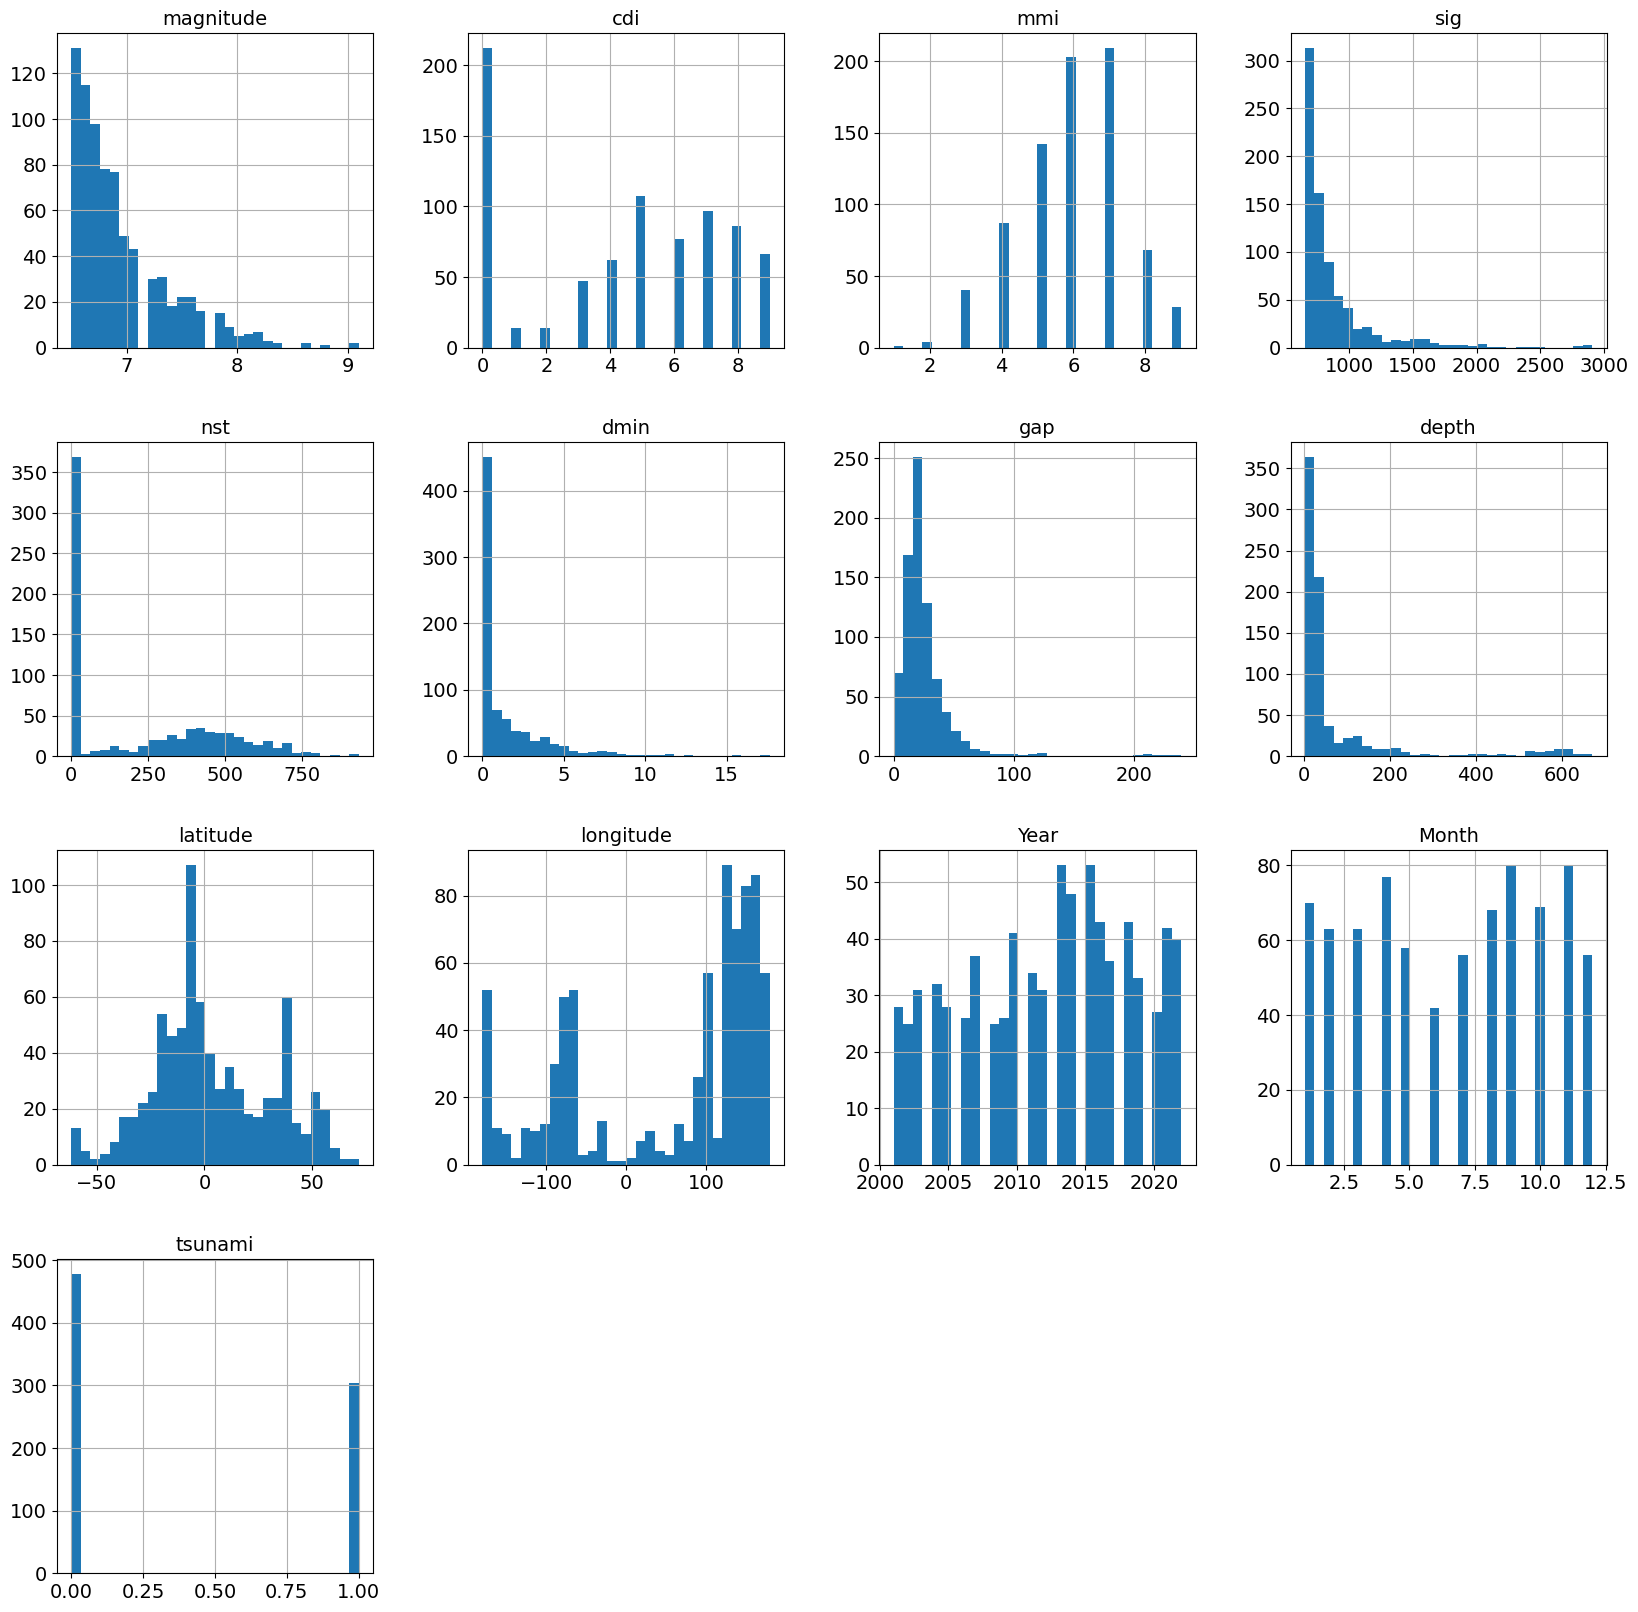

In [14]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14,titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

data.hist(bins=30, figsize=(20,20))
plt.show()

In [24]:
x = data.drop(['tsunami'], axis= 1)
y = data['tsunami']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=43, shuffle=True) 

In [27]:
scaler = RobustScaler()
scaler.fit(X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

In [8]:
def train(Model, X =x, Y=y,X_train = X_train, X_test = X_test, Y_train = Y_train, Y_test = Y_test):
    

    m = Model
    m.fit(X_train,Y_train)
    pred = m.predict(X_test)
    print('\t', Model)
    print(classification_report(Y_test,pred))



In [21]:
train(KNeighborsClassifier(n_neighbors= 3),x,y)
train(SVC(),x,y) 
train(GaussianNB(),x,y)


train(DecisionTreeClassifier(max_depth=3, random_state=44),x,y)
train(RandomForestClassifier(n_estimators=150, random_state=44),x,y)
train(LogisticRegression(),x,y)

	 KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.84      0.84      0.84        57

    accuracy                           0.89       157
   macro avg       0.88      0.88      0.88       157
weighted avg       0.89      0.89      0.89       157

	 SVC()
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       100
           1       0.71      0.89      0.79        57

    accuracy                           0.83       157
   macro avg       0.82      0.84      0.82       157
weighted avg       0.85      0.83      0.83       157

	 GaussianNB()
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       100
           1       0.73      0.89      0.80        57

    accuracy                           0.84       157
   macro avg       0.83      0.85      0.83       157
weighted avg 

c:\Users\O.J\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
train(RandomForestClassifier(n_estimators=150, random_state=44),X_train= X_trainScaled, X_test=X_testScaled)

	 RandomForestClassifier(n_estimators=150, random_state=44)
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       100
           1       0.87      0.95      0.91        57

    accuracy                           0.93       157
   macro avg       0.92      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157

